<a href="https://colab.research.google.com/github/Dots11/DavesProjects/blob/master/02_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classification problems.

A classication is where you try to classify something as one thing or another.

A few types of classification problems:
    Binary Classification
    Multiclass Classification
    Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [ ]:
#Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [ ]:
#Visualise using pandas dataframe
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


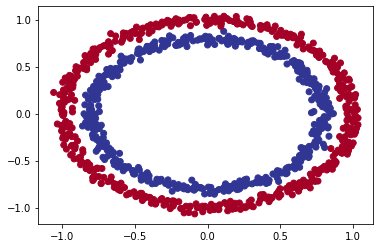

In [ ]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shape

In [ ]:
#Check the shapes of our labels and features
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10] # it is a scalar as it has one output/value and no second dimension 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
# How many samples we are working

len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

## Steps in modelling

The steps in modelling with TensorFlow are typically:
    
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Set the random seed
import tensorflow as tf
import numpy as np
tf.random.set_seed(42)

# 1. Create the model using the Swquential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [ ]:
# Let's try training model for longer
model_1.fit(X,y, epochs=100, verbose=0) 
model_1.evaluate(X,y) # purposeful mistake

# Always fit on training data, and evaluate on testing data

32/32 [==============================] - 0s 903us/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Since we are working on a binary classificaation problem and our model is getting about 50 percent accuracy.
Let's add an additional layer
And remove the evaluate form the training data.

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create our model
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)])

#2. Compile our model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit our model
model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
#Then evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935763955116272, 0.5]

## Improving our model

Let's look into our bag of tricks to see how to improve our model.
1. Create a model - we might add more layers or increase the number sof hidden units within a layer
2. Compiling the model - here we might to choose a different optimiation function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In this example, we are going to change the optimizer to Adam with learning_rate 0.001, and add 30 neurons to each layer, and set the activation for each layer to "relu", and set the end layer to "2".

In [ ]:
#Visualise again - our model is essentially guessing 
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create our model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation="relu"),
                              tf.keras.layers.Dense(30, activation="relu"),
                              tf.keras.layers.Dense(2, activation="relu")])

#2. Compile our model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"],
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

#3. Fit our model
model_3.fit(X,y, epochs = 100, verbose=0)

In [ ]:
#Evaluate our model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.5200


[0.0036878858227282763, 0.5199999809265137]

## Improve again

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4480
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4590
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4550
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4760
Epoch 93/100


In [ ]:
#Evaluate our model
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

#Visualise our predicitions
Let#s create a function 'plot_decision_boundary()' to visualise our model's predictions. This model will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predicitons as well as a line between zones (where each unique class fails)


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification...


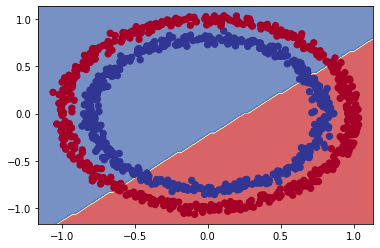

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_4, X,y)

We can now see from above that our data is not separable by a straight line

In [ ]:
# Let's see if our model can be used for a regression problem...
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\david\pycharmprojects\machine learning intro\venv\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Oh wait... we compiled our model for  a binary clasification problem.

But... we're now working on a regression problem, let#s change the model to suit our data.


In [ ]:
#Create our linear regression model to suit the above


# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_4.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100, verbose=0)



It seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 0s/step


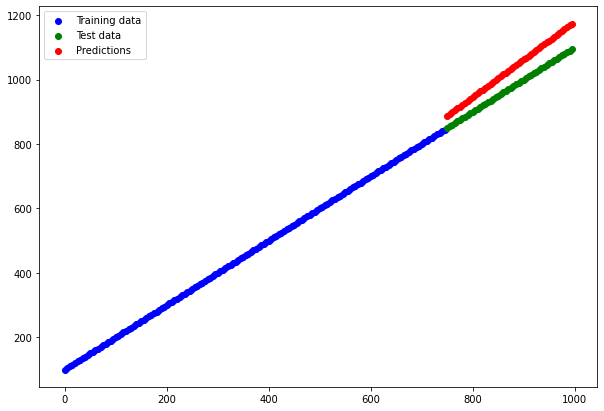

In [ ]:
#Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();


## The missing piece: non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create our model
model_4 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)])

#2. Compile our model
model_4.compile(loss = "binary_crossentropy",
               metrics = ["accuracy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

#3. Fit our model
history = model_4.fit(X,y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 877us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 989us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch

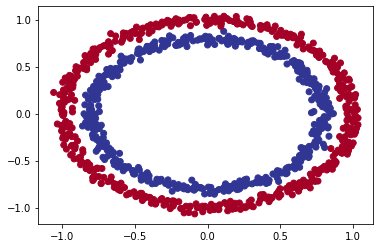

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 704us/step
doing binary classification...


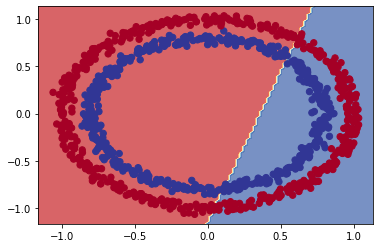

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

#3. Fit our model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3844 - accuracy: 0.2360
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3332 - accuracy: 0.2350
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3077 - accuracy: 0.2330
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2663 - accuracy: 0.2320
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2259 - accuracy: 0.2310
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2107 - accuracy: 0.2310
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1901 - accuracy: 0.2300
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1621 - accuracy: 0.2300
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1375 - accuracy: 0.2300
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1195 - accuracy: 0.2300
Epoch 11/

Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7931 - accuracy: 0.2180
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7904 - accuracy: 0.2170
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7877 - accuracy: 0.2170
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.2160
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7828 - accuracy: 0.2160
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7805 - accuracy: 0.2150
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7783 - accuracy: 0.2150
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7762 - accuracy: 0.2150
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7741 - accuracy: 0.2150
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7721 - accuracy: 0.2120


In [ ]:
# Time to replicate the multi-layer neural network from tensorflow playground

#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile our model
model_6.compile(loss="binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# 3. Fit our model
model_6.fit(X,y, epochs=300, verbose=0)

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 752us/step
doing binary classification...


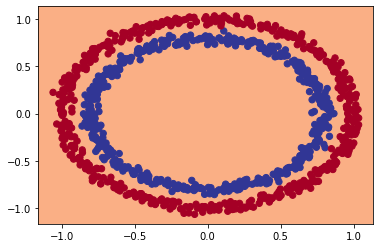

In [ ]:
#How do our model predictions look?
plot_decision_boundary(model_6, X,y)

In [ ]:
# Create our model again
# Set random seed
tf.random.set_seed(42)

# 1. Create our model
model_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compile our model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
               )

# 3. Fit our model
model_7.fit(X,y, epochs=250,verbose=0)

In [ ]:
#4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.045933641493320465, 0.9919999837875366]

313/313 [==============================] - 0s 755us/step
doing binary classification...


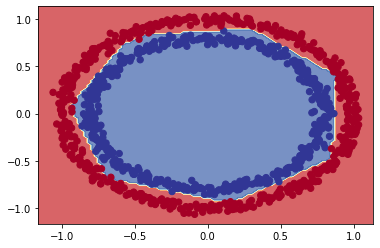

In [ ]:
#Let's visualise our metrics
plot_decision_boundary(model_7, X,y)

**Note:** the combination of linear(straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines) let's see them in action

In [ ]:
# Create a toy tensor (similar to data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

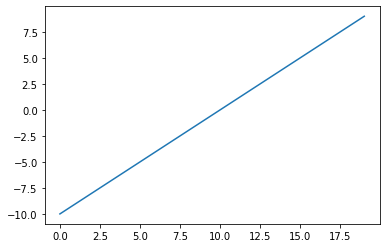

In [ ]:
#Visualise our toy tensor
plt.plot(A);

In [ ]:
#Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

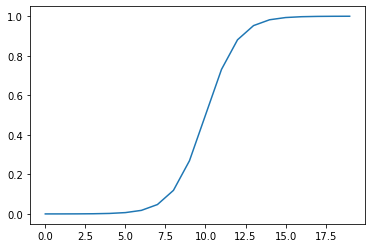

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
#Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

#Pass our toy tensor to our custom relu function

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

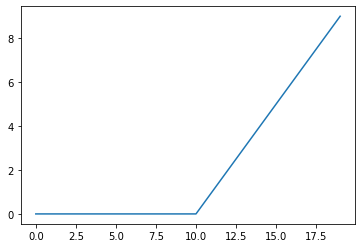

In [ ]:
plt.plot(relu(A)) # relu line

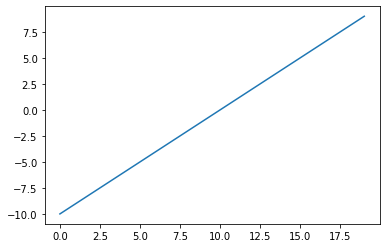

In [ ]:
plt.plot(A) # sigmoid line

In [ ]:
#Let's try the linear activation function
tf.keras.activations.linear(A)
#Passes the same tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

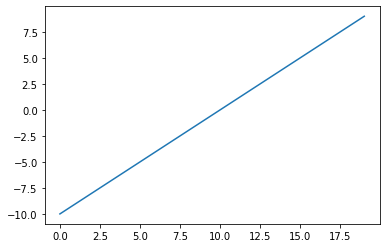

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

*Note: The linear activation function does not change our data in any way, it passes the same input data throughout the neural network of the model, as a result the outputs are as good as guessing.

*Note: Non-linear activation functions enable us to deduce patterns in non-linear data.

* A combination of linear and non-linear activation functions are key to help model read patterns in our data.

### Evaluating and improving our classifications

So far we have been training and testing on the same dataset,

In machine learning, this is a sin.

So we need to create a training and testing set.

In [ ]:
#Check how many examples we have
len(X)

1000

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# We can train_test_split the above or, index it.

#Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create our model
model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                              tf.keras.layers.Dense(4, activation = "relu"),
                              tf.keras.layers.Dense(1, activation = "sigmoid")])

# 2. Compile our data
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(), # tells us how wrong the internal patterns are
               metrics = ["accuracy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)) # from loss, optimizer tells us how our model should improve, by updating the internal patterns. Learning rate tells us how much to improve the patterns.

# 3. Fit our model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 543us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 652us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/

In [ ]:
# 4. Evaluate the model on the test dataset (We increased the learning rate by 10x (lr=0.01))

model_8.evaluate(X_test, y_test) # 100% accuracy out of 200 test values

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 0s 654us/step
doing binary classification...
313/313 [==============================] - 0s 652us/step
doing binary classification...


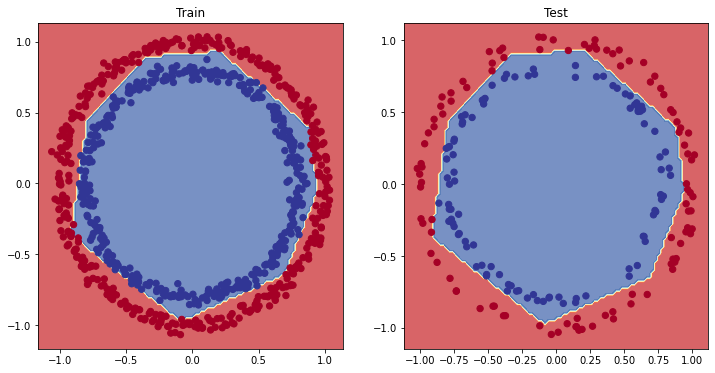

In [ ]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) # one row two columns, and the first value is going to be the training plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.6846511960029602,
  0.6777210235595703,
  0.6735944151878357,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038309335708618,
  0.5714035630226135,
  0.5404428243637085,
  0.5015038847923279,
  0.46833184361457825,
  0.4113016128540039,
  0.3625059127807617,
  0.3209044337272644,
  0.2847079932689667,
  0.2597200274467468,
  0.23746906220912933,
  0.2135196328163147,
  0.1938202977180481,
  0.17524370551109314,
  0.1618930697441101,
  0.15498913824558258,
  0.14897292852401733],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662

In [ ]:
#Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

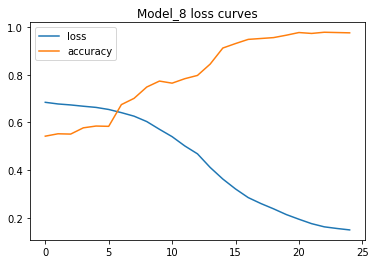

In [ ]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

Note: For many problems, the loss function going down means the model is improving (the predictions are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model(we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create our model (same as model_8)
model_9 = tf.keras.Sequential([tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(10, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")])

# 2. Compile our model

model_9.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               metrics = ["accuracy"],
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.01))

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit our model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.5387 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.4875 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7013 - accuracy: 0.5163 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5013 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4963 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7170 - accuracy: 0.5138 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7143 - accuracy: 0.4938 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.4963 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.4

<AxesSubplot:xlabel='epochs'>

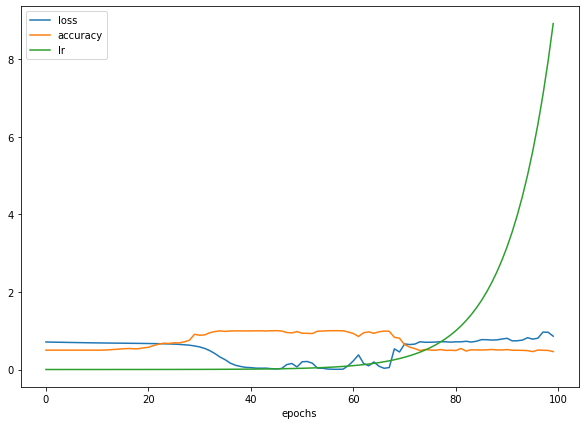

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

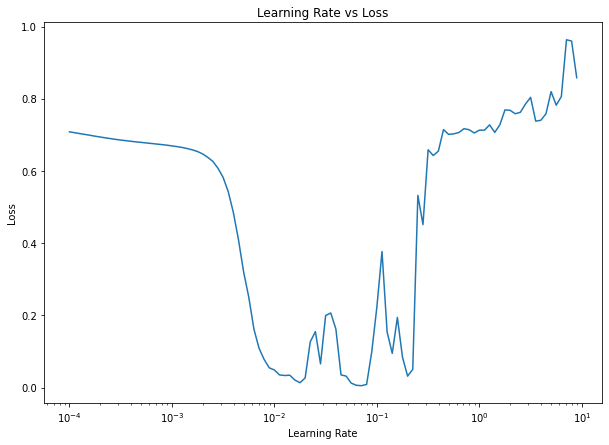

In [ ]:
# Plot the learning rate versus the loss - we can use this to determine the ideal learning rate
lrs= 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
# Example of other typical learning rate values:

10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
0.003, 0.0025

(0.003, 0.0025)

In [ ]:
# Let's try using a higher * ideal* learning rate within the same model.

#Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_10 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                metrics = ["accuracy"],
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02))

# 3. Fit our model (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/

Epoch 83/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9900
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9837
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9962
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9937
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9925
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9975
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.9987
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9975
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9912


In [ ]:
# Evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9950


[0.01856575533747673, 0.9950000047683716]

In [ ]:
#Evaluate model 8 on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 0s 816us/step
doing binary classification...
313/313 [==============================] - 0s 935us/step
doing binary classification...


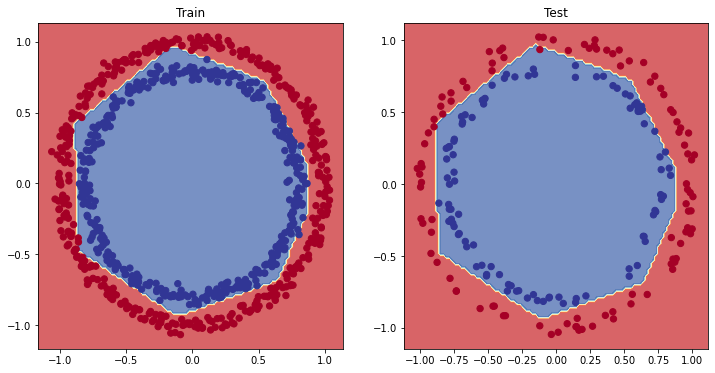

In [ ]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

### More classification evaluation methods

Alongside  visualizing our model's resutls as much as possible, there are a handful of other classificaiton evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report from scikit learn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9950
Model loss on the test set: 0.01856575533747673
Model accuracy on the test set: 99.50%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10] # are in binary form

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [ ]:
y_preds[:10] # are in continuous form, need to be binary to calculate confusion_matrix classification

array([[9.9941581e-01],
       [1.0000000e+00],
       [9.9912846e-01],
       [9.9999917e-01],
       [3.3019076e-03],
       [8.3788043e-05],
       [9.9976909e-01],
       [8.2754541e-06],
       [9.9999136e-01],
       [1.0373950e-11]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form.. the standard output from the sigmoid (softmax) activation function.


In [ ]:
0.9825e-01

0.09825

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)

How about prettifying our confusion matrix?

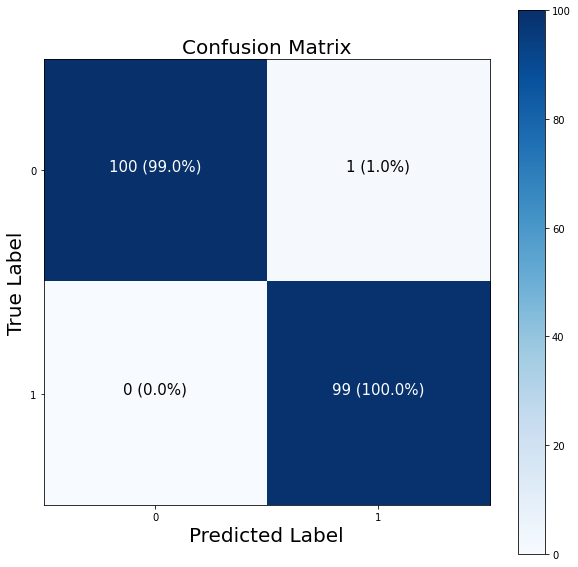

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of the scikit learns plot_confusion_matrix function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normallize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False # set up a bool; if we do have a multiclass, we want it to do something. If binary class (what we have now), we want to do something else

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0]) # this would be the shape of the range of our confusion matrix shape "2"
    
# Label the axes

ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust labels and title sizes
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colours e.g. gives different shades based on no of values for each eg. tp, fn etc.
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)

Check confusion matrix chart examples online

In [ ]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [ ]:
cm.shape[0]

2

### Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classifiation, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alreasdy been sorted into training and test sets for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() # importing through two tuples


In [ ]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape


((28, 28), ())

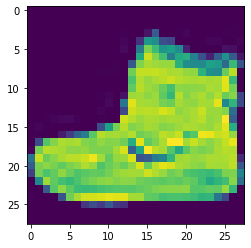

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

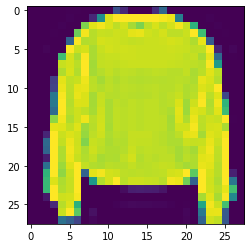

In [ ]:
# Plot a single sample
plt.imshow(train_data[7])

In [ ]:
# Check our sample's label
train_labels[7]

2

In [ ]:
# We want our label's to be in human form
# Create a small list so we can index onto our training labels as they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

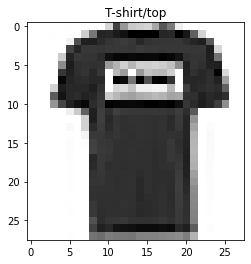

In [ ]:
#Plot an example image and it's label
index_of_choice = 1
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

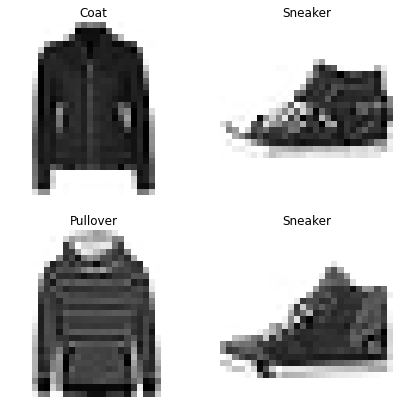

In [ ]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data))) #"would be the range from 0-59999 from our trainning data, 4 at random onto a subplot
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary) # shows image from the generated value from the random index "rand_index". "cm.binary" comes out as grayscale
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
           

Next step, we don't have to turn the dataset into tensors as it has been already done for us, so straight to building our model

### Building a multi-class classification model
For our multi-class classificaiton model, we can use a simlar architecture to our binary classifiers, however, we're going to have a tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 *28

784

In [ ]:
#Check first 10 labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
                               ])

# Compile our model

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
                optimizer= tf.keras.optimizers.Adam())

# Fit our model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs=10,
                                validation_data=(test_data, test_labels)) # this parameter trains on the training data, then validates (how good its patterns are) on the validation data (data it has not seen before) 



Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary
model_12.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_123 (Dense)           (None, 4)                 3140      
                                                                 
 dense_124 (Dense)           (None, 4)                 20        
                                                                 
 dense_125 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalised), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()



(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model 11)
model_12 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "softmax")])

# Compile our model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"],
                optimizer = tf.keras.optimizers.Adam())

# Fit the model
norm_history = model_12.fit(train_data,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<AxesSubplot:title={'center':'Normalized data'}>

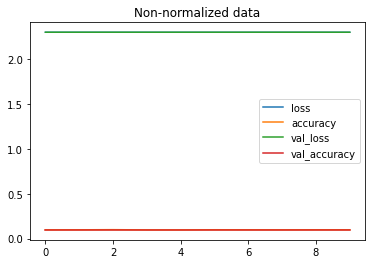

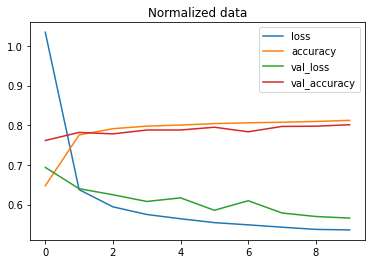

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# PLot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** the same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture) e.g. don't change 10 things and compare that model to another, change 1 thing at a time to know what change made the difference in performance.

## Finding the ideal learning rate

In [ ]:
#Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")
                               ])

# Compile model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"],
                optimizer = tf.keras.optimizers.Adam())

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal learning rate')

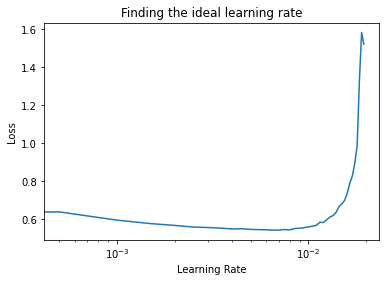

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10*(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # model loss plotted on log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-2

0.01

In [ ]:
#Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

# Fit the model

history_14 = model_14.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8661 - accuracy: 0.6932 - val_loss: 0.8452 - val_accuracy: 0.7093
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8399 - accuracy: 0.7001 - val_loss: 0.8149 - val_accuracy: 0.7089
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8276 - accuracy: 0.7054 - val_loss: 0.8251 - val_accuracy: 0.7037
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 0.9053 - val_accuracy: 0.6706
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8157 - accuracy: 0.7085 - val_loss: 0.8032 - val_accuracy: 0.7090
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8051 - accuracy: 0.7094 - val_loss: 0.9451 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

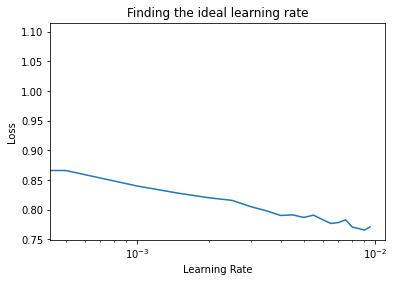

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10*(tf.range(20)/20))
plt.semilogx(lrs, history_14.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualization)
* Improve its resutls (by training it for longer or changing the architecture)
* Save and export it for use in an application
    
Let's go through the top 2...
    

In [ ]:
# Create a confusion matrix
# Note: the confusion matrix code we're about to write is a remix of the scikit learns plot_confusion_matrix function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    
    #Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normallize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0]) # this would be the shape of the range of our confusion matrix shape "2"

    # Label the axes

    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust labels and title sizes
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colours e.g. gives different shades based on no of values for each eg. tp, fn etc.
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment = "center",
                color="white" if cm[i,j] > threshold else "black",
                size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[5.09483167e-09, 2.98006546e-16, 1.73920073e-10, 2.72270313e-15,
        2.40472607e-11, 1.08815514e-01, 1.40117895e-09, 5.99770963e-01,
        1.30384797e-04, 2.91283190e-01],
       [8.39951914e-04, 1.03152348e-10, 8.51060331e-01, 2.87362171e-04,
        1.16704777e-01, 1.03576259e-13, 3.10419071e-02, 4.52357880e-27,
        6.57249620e-05, 8.65482172e-16],
       [3.70257460e-02, 9.49316859e-01, 9.33282572e-05, 1.29483277e-02,
        1.56407750e-05, 6.63915278e-09, 5.61389956e-04, 2.21992602e-09,
        3.87145446e-05, 3.48374927e-14],
       [3.70257460e-02, 9.49316859e-01, 9.33282572e-05, 1.29483277e-02,
        1.56407750e-05, 6.63915278e-09, 5.61389956e-04, 2.21992602e-09,
        3.87145446e-05, 3.48374927e-14],
       [1.81978136e-01, 3.26287991e-05, 2.48294070e-01, 2.25484688e-02,
        1.07771575e-01, 3.90472997e-04, 4.31917340e-01, 2.24152652e-09,
        7.06697302e-03, 2.31127814e-07]], dtype=float32)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.0948317e-09, 2.9800655e-16, 1.7392007e-10, 2.7227031e-15,
        2.4047261e-11, 1.0881551e-01, 1.4011790e-09, 5.9977096e-01,
        1.3038480e-04, 2.9128319e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [ ]:
# Now our predictions "y_preds" are in same format as our test_labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Evaluate our model_14
model_14.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.8220 - accuracy: 0.7102


[0.8220476508140564, 0.7102000117301941]

In [ ]:
# Let's make the from scratch boring confusion matrix for model_14
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred= y_preds)

array([[740,  15,   7, 146,   1,   4,  66,   0,  21,   0],
       [ 22, 921,   0,  45,   0,   0,  10,   1,   1,   0],
       [111,   0, 500,  24,  95,   7, 259,   0,   4,   0],
       [ 48,  28,   0, 809,   1,   3,  95,   0,  16,   0],
       [ 18,   1, 192,  85, 350,  19, 330,   0,   5,   0],
       [  0,   0,   0,   0,   0, 706,  12, 184,  23,  75],
       [209,   2, 107, 115,  95,   9, 429,   0,  34,   0],
       [  0,   0,   0,   0,   0,   6,   0, 968,  16,  10],
       [  7,   1,   0,  29,   8,  30,  13,  25, 887,   0],
       [  0,   0,   0,   0,   0,  33,   0, 174,   1, 792]], dtype=int64)

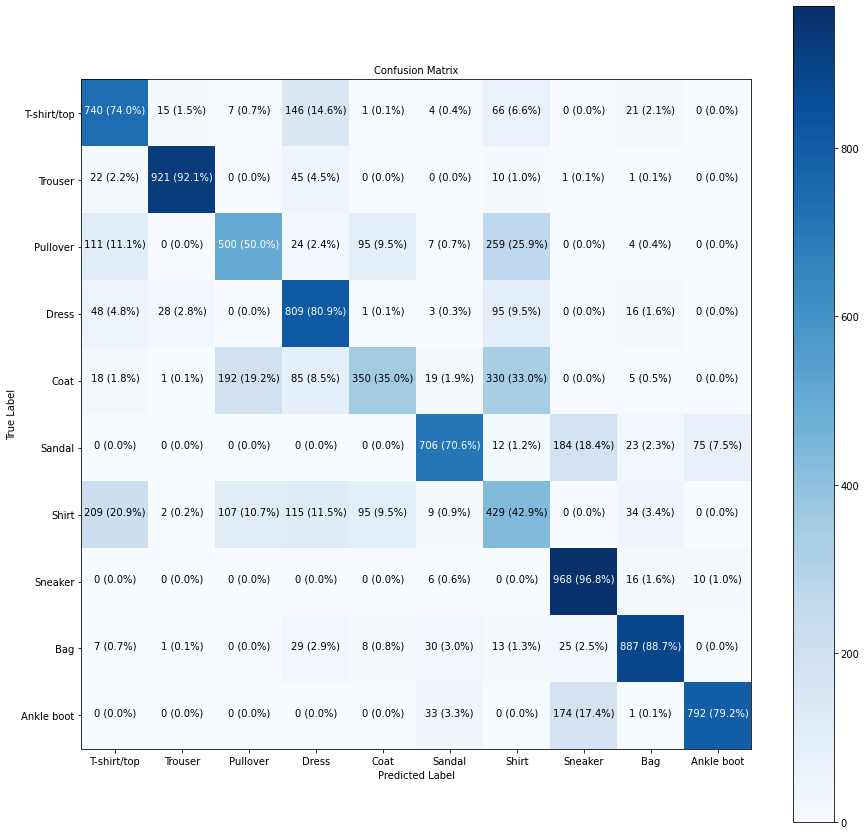

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                     y_pred= y_preds,
                     classes = class_names,
                     figsize = (15, 15),
                     text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possibel to develop[ a further understanding of the data and the inputs and outputs of your models.
    
How about we create a fun little function for:

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label


In [ ]:
import random
# Create helper function
def plot_random_image(model, images, true_labels, classes):
    
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28,28)) # predicting only 1 image at a time
    pred_label = classes[pred_probs.argmax()] # the index of pred_probs that has the highest prediction probility
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true_label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # Set the color to green or red based on if prediction is right or wrong
    

1/1 [==============================] - 0s 36ms/step


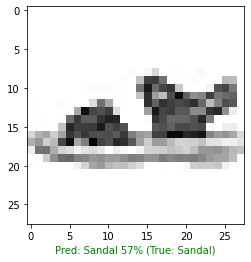

In [ ]:
# Check out a random images as well as its prediction
plot_random_image(model=model_14,
                 images=test_data, # always make predictions on the same kind of data your model was trained on
                 true_labels=test_labels,
                  classes= class_names)
                  

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model

model_14.layers

In [ ]:
#Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the paatterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 2.8719202e-02, -5.9449949e+00,  2.4248156e-01, -6.1984658e-03],
        [-8.1385076e-02,  2.8802879e+00, -3.2354480e-01,  6.4998612e-02],
        [-4.7761228e-02,  2.3441374e+00, -7.2022219e+00,  3.8801804e-02],
        ...,
        [ 1.5568607e-02,  9.4948953e-01, -4.1529614e-01, -2.3489632e-02],
        [ 1.0950416e-02,  2.8324656e+00,  1.7497534e+00, -7.4611455e-02],
        [-4.8297942e-03,  2.7748330e+00, -3.0736594e+00, -5.8123276e-02]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_14.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_153 (Dense)           (None, 4)                 3140      
                                                                 
 dense_154 (Dense)           (None, 4)                 20        
                                                                 
 dense_155 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-0.0600306, 10.111918 , 15.193949 , -0.0600509], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vectors gets initialized as "zeros" (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding wights matrix should influence the next layer.

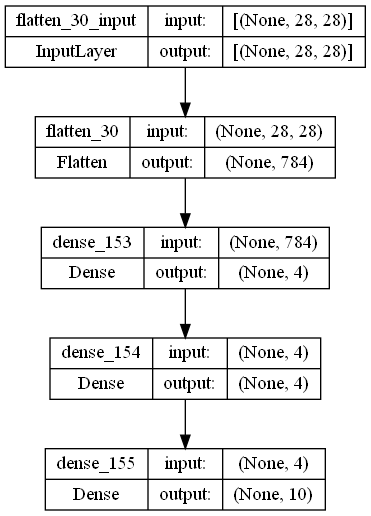

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

In [ ]:
# Next check out exercises and extra curriculum...